In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os 
os.chdir("drive/My Drive/Asian_faces")

In [4]:
!pwd

/content/drive/My Drive/Asian_faces


In [5]:
!curl -s https://course.fast.ai/setup/colab | bash

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


In [6]:
from fastai.vision import *
from fastai.metrics import error_rate
import numpy as np

In [7]:
from pathlib import Path

In [8]:
path = Path(".")


In [9]:
path.ls()

[PosixPath('face_download.py'),
 PosixPath('faces_data'),
 PosixPath('models'),
 PosixPath('torch_models'),
 PosixPath('face_torch.ipynb'),
 PosixPath('face_classification.ipynb')]

In [10]:
data_path = path/"faces_data"
japanese = data_path/"japanese"
korean = data_path/"korean"
chinese = data_path/"chinese"

In [11]:
bs = 32

In [12]:
tfms = get_transforms(max_rotate=15, max_zoom=1.2, max_warp=0.2)

In [13]:
np.random.seed(42)
src = (ImageList.from_folder(data_path).split_by_rand_pct().label_from_folder())

In [14]:
data = (src.transform(tfms, size=264).databunch(bs=bs).normalize(imagenet_stats))

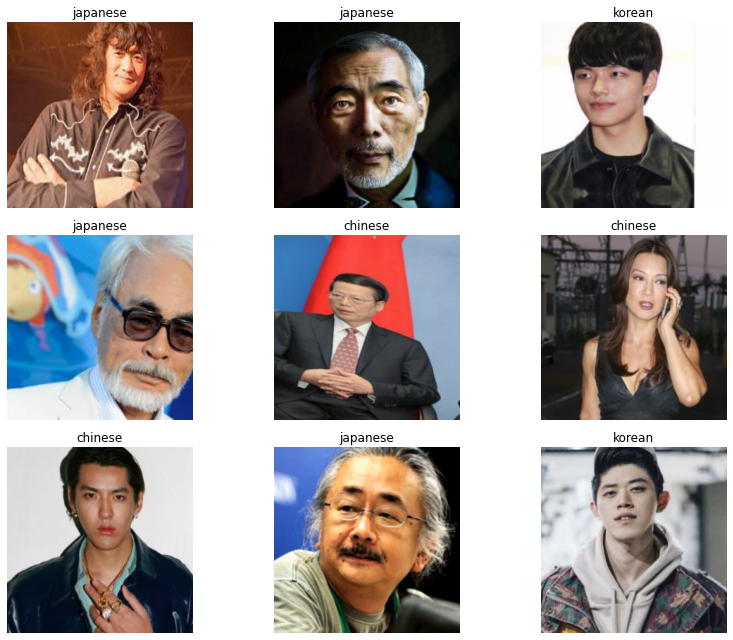

In [15]:
data.show_batch(rows=3, figsize= (12,9))

In [16]:
data.classes

['chinese', 'japanese', 'korean']

In [17]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


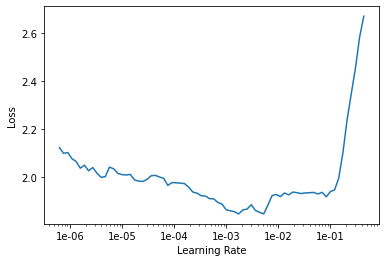

In [19]:
learn.recorder.plot()

In [20]:
lr = 1e-03

In [21]:
learn.fit_one_cycle(12, slice(lr), pct_start=0.6)

epoch,train_loss,valid_loss,accuracy,time
0,1.885346,1.135953,0.494774,01:51
1,1.609728,1.163569,0.529617,00:31
2,1.473168,1.322025,0.505226,00:31
3,1.374389,1.328672,0.536585,00:31
4,1.277772,1.378839,0.571429,00:31
5,1.175406,1.316970,0.529617,00:31
6,1.047443,1.337104,0.540070,00:31
7,0.923031,1.187286,0.571429,00:31
8,0.861939,1.170414,0.595819,00:31
9,0.752205,1.060142,0.602787,00:31


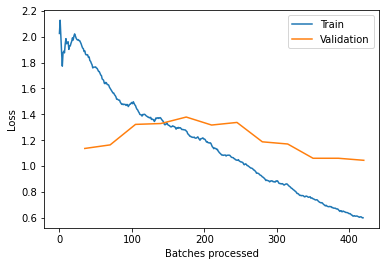

In [22]:
learn.recorder.plot_losses()

In [23]:
learn.unfreeze()


In [24]:
lr = slice(lr/10, lr)

In [25]:
learn.fit_one_cycle(12, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.527667,1.072144,0.627178,00:44
1,0.594260,1.499789,0.557491,00:40
2,0.841813,1.521337,0.515679,00:40
3,0.905693,1.136672,0.564460,00:40
4,0.772262,1.224602,0.560976,00:40
5,0.633172,1.086093,0.630662,00:40
6,0.485043,1.444217,0.571429,00:40
7,0.388106,1.363270,0.602787,00:41
8,0.281747,1.308118,0.641115,00:41
9,0.194825,1.211684,0.648084,00:40


In [30]:
learn.save("stage-1")

In [31]:
interp = ClassificationInterpretation.from_learner(learn)

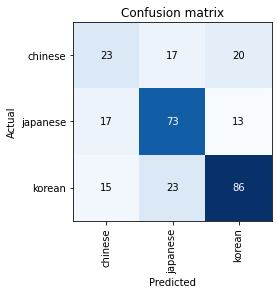

In [32]:
interp.plot_confusion_matrix()

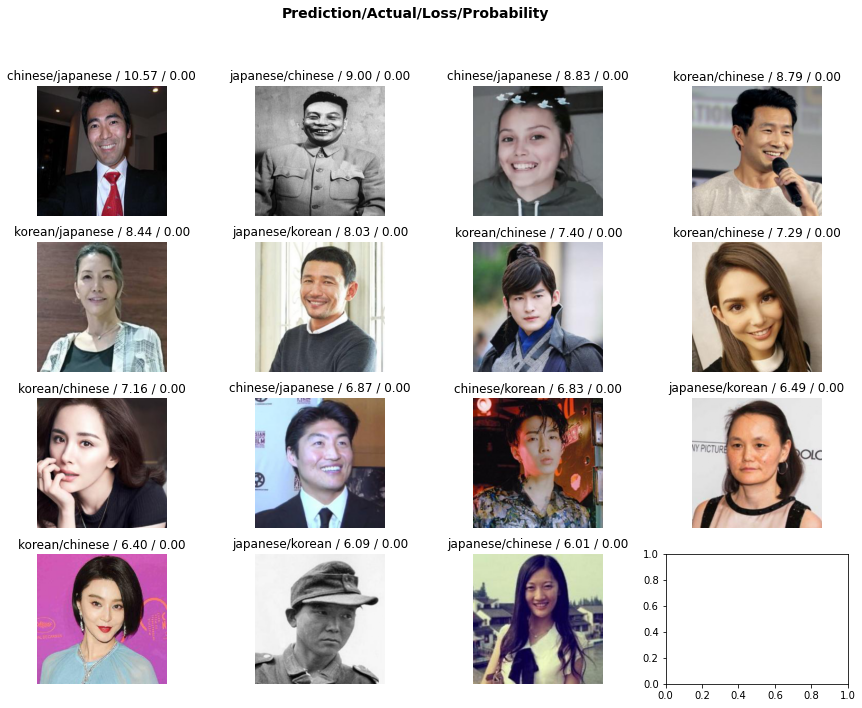

In [33]:
interp.plot_top_losses(15, figsize=(15,11))